In [ ]:
%pip install tensorflow tensorflow-datasets

In [ ]:
%pip install --upgrade tensorflow numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.4 MB/s eta 0:00:00
ERROR: Operation cancelled by user


## Import necessary libraries

matplotlib: creating static, animated, and interactive visualizations.
numpy: mathematical operations on arrays
TensorFlow :is an open-sourced end-to-end platform, a library for multiple machine learning tasks, while Keras : is a high-level neural network library that runs on top of TensorFlow. Both provide high-level APIs used for easily building and training models,

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

find the Datasets

list.builders()
It is similar to a list comprehension, but instead of creating a list, it creates a generator object that can be iterated over to produce the values in the generator.

In [ ]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview

tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

Get information on the data
by choosing rock_paper_scissors

In [ ]:
builder = tfds.builder('rock_paper_scissors')

info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path=PosixGPath('/tmp/tmpqtbthcprtfds'),
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

##Prepare Rock, Paper, Scissors Data
by separating test and training data

In [ ]:
ds_train = tfds.load("rock_paper_scissors",split="train")
ds_test = tfds.load("rock_paper_scissors",split="test")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteM4XJ4K/rock_paper_scissors-train.tfrec…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteM4XJ4K/rock_paper_scissors-test.tfreco…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


## example

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


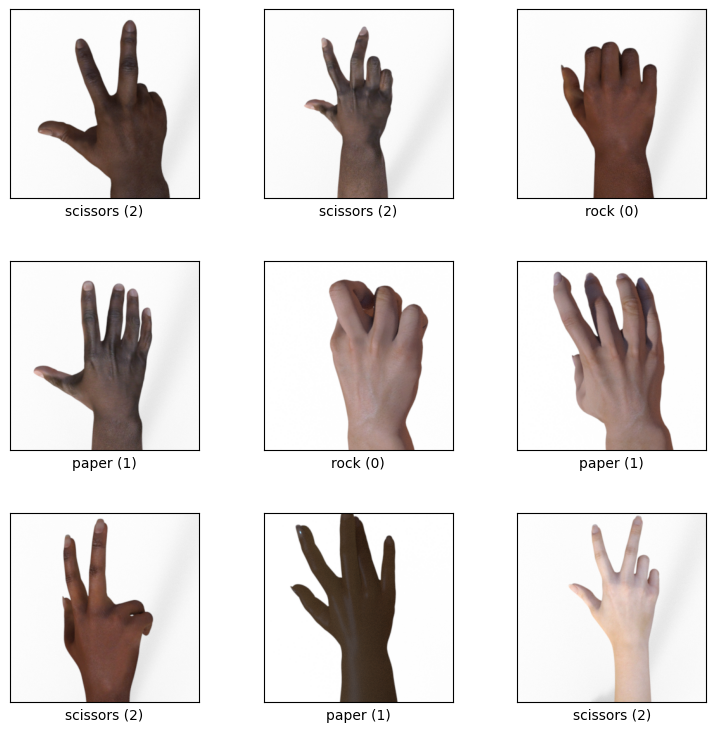

In [ ]:
fig = tfds.show_examples(info, ds_train)

##Additional data Preparation convert to numpy format & normalise the valuse from 0 to 1 & reshape


go to tfds and check Iterate over a dataset and the key (image,lable)

reduce the no. of things that ANN learn
type() see the first image

In [ ]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [ ]:
#train_images.shape
#test_images.shape
#reshape by train_images = train_images.reshape(2520,300,300,1)
#change the couler channel from 3 to 1 bc we need to see edges

train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

#train_images.dtype ##unit8  means have R channel

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255 #normalise data from 0 to 1
test_images /= 255


In [ ]:
#train_images[0] #you will see al valus zeros
#train_images[0].shape
#type(train_images[0])
#print("Datatype: ", train_images.dtype)
#print("Datatype: ", test_images.dtype)


##Train a network (basic approuch)
##to classify images

Dense Keras is the layer that contains all the neurons that are deeply connected within themselves(hidden layer)
used to classify image based on output from convolutional layers.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(), ## put the images in single coulmn
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(3, activation='softmax') ##the last dense layer must have the right number of neurons
                                                ##and appropriate activation function
])

model.compile(optimizer='adam', ##adam helps adjust the parameters of a neural network in real-time to improve its accuracy and speed
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)
##ReLU helps models to learn faster and it's performance is better.
##Similarly, softmax is also a activation function which is used for multi-classification model.
##Generally softmax is deployed on output layer of neural network model.

Epoch 1/5
79/79 [==============================] - 7s 15ms/step - loss: 19.7079 - accuracy: 0.4488
Epoch 2/5
79/79 [==============================] - 1s 16ms/step - loss: 2.2971 - accuracy: 0.6353
Epoch 3/5
79/79 [==============================] - 1s 15ms/step - loss: 1.9331 - accuracy: 0.6698
Epoch 4/5
79/79 [==============================] - 1s 15ms/step - loss: 0.6944 - accuracy: 0.7925
Epoch 5/5
79/79 [==============================] - 1s 15ms/step - loss: 0.3355 - accuracy: 0.8849


In [ ]:
model.evaluate(test_images,test_labels) ##unseen data you got 50% test data which means there’s a big disconnected

12/12 [==============================] - 0s 8ms/step - loss: 1.8492 - accuracy: 0.5753


[1.849226474761963, 0.5752688050270081]

##Train a Network (conventional approach)
Grid image

In [ ]:
model = keras.Sequential([

    keras.layers.Conv2D(64, 3 ,activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
    ])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 25s 173ms/step - loss: 3.3642 - accuracy: 0.7544
Epoch 2/5
79/79 [==============================] - 11s 139ms/step - loss: 0.1438 - accuracy: 0.9702
Epoch 3/5
79/79 [==============================] - 11s 141ms/step - loss: 0.0110 - accuracy: 0.9972
Epoch 4/5
79/79 [==============================] - 11s 143ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 5/5
79/79 [==============================] - 11s 144ms/step - loss: 0.0016 - accuracy: 1.0000


In [ ]:
model.evaluate(test_images,test_labels,) ## failed more than %50

12/12 [==============================] - 2s 152ms/step - loss: 1.9204 - accuracy: 0.5430


[1.9204154014587402, 0.5430107712745667]

##A better CN
issue: limited training example
the pass box over the image is not covering the area  

In [ ]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
    ## After this layer from 300 to 50
    keras.layers.Conv2D(64, 3 ,activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPool2D(2,2), ## increase the acc
    keras.layers.Dropout(0.5), ##cut out 50% of the connection
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
    ])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 5s 34ms/step - loss: 1.3629 - accuracy: 0.5159
Epoch 2/5
79/79 [==============================] - 2s 28ms/step - loss: 0.2658 - accuracy: 0.9270
Epoch 3/5
79/79 [==============================] - 2s 29ms/step - loss: 0.0632 - accuracy: 0.9881
Epoch 4/5
79/79 [==============================] - 2s 30ms/step - loss: 0.0338 - accuracy: 0.9933
Epoch 5/5
79/79 [==============================] - 2s 28ms/step - loss: 0.0207 - accuracy: 0.9964


In [ ]:
model.evaluate(test_images,test_labels,)

12/12 [==============================] - 0s 31ms/step - loss: 2.1577 - accuracy: 0.5968


[2.157693862915039, 0.5967742204666138]

##Keras Tuner doucumentaion

The Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your TensorFlow program

In [ ]:
pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 12.3 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu')) ## show how many CN&dense layers

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu')) ##parameter weight

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,## up
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size =32)

Trial 32 Complete [00h 00m 23s]
val_accuracy: 0.3333333432674408

Best val_accuracy So Far: 0.7956989407539368
Total elapsed time: 00h 21m 04s


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 13ms/step - loss: 0.5878 - accuracy: 0.7957


[0.5878487229347229, 0.7956989407539368]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (Average  (None, 99, 99, 1)         0         
 Pooling2D)                                                      
                                                                 
 conv2d (Conv2D)             (None, 97, 97, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 16)        9232      
                                                                 
 conv2d_2 (Conv2D)           (None, 93, 93, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 46, 46, 16)        0

In [ ]:
tuner.results_summary() ## to get high-level result

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 17 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 64
layer_0_filters: 64
layer_1_filters: 16
layer_2_filters: 16
Score: 0.7956989407539368

Trial 10 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 1024
layer_0_filters: 64
layer_1_filters: 64
layer_2_filters: 16
Score: 0.7876344323158264

Trial 22 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 256
layer_0_filters: 32
layer_1_filters: 32
layer_2_filters: 16
Score: 0.7715053558349609

Trial 27 summary
Hyperparameters:
Conv Layers: 1
Dense layer: 64
layer_0_filters: 64
layer_1_filters: 16
layer_2_filters: 32
Score: 0.7688171863555908

Trial 11 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 128
layer_0_filters: 64
layer_1_filters: 16
layer_2_filters: 64
Score: 0.7634408473968506

Trial 28 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 1024
layer_0_filters: 32
layer_1_filters: 64
layer_2_fil

##Save and download

In [ ]:
best_model.save('./my_model') ##save all parameters in model

In [ ]:
loaded_model = keras.models.load_model('./my_model') ##reloaded

In [ ]:
loaded_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 13ms/step - loss: 0.5878 - accuracy: 0.7957


[0.5878487229347229, 0.7956989407539368]


## Plot Image from Numpy Array

(300, 300, 3)

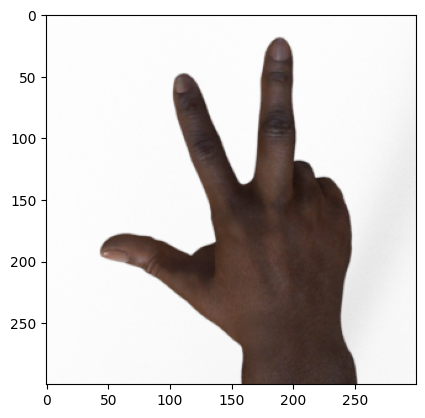

In [ ]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]

image = train_images[0].reshape(300,300)

plt.imshow(rgb_image)

rgb_image.shape


##predict


In [ ]:
result = best_model.predict(np.array([train_images[0]]))
print(result)

predicted_value = np.argmax(result)
print(predicted_value)

1/1 [==============================] - 0s 20ms/step
[[3.3859218e-05 1.7325076e-05 9.9994886e-01]]
2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Convert PNG/JPG images to Numpy Format
Through library called imageio


In [ ]:
import imageio

im = imageio.imread('rockpaperscissors.jpg')

print(type(im))

im_np = np.asarray(im) ## pass image im

print(im_np.shape)

<class 'numpy.ndarray'>
(889, 558, 3)


<ipython-input-64-06c0ae4eb097>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('rockpaperscissors.jpg')


In [ ]:
from google.colab import files
import io
import imageio
import numpy as np
import matplotlib.pyplot as plt

### Upload an image from your local machine

In [ ]:
uploaded = files.upload()

Saving rockpaperscissors.JPG to rockpaperscissors (2).JPG


# Process the uploaded image

In [ ]:
for filename, content in uploaded.items():
    image = imageio.imread(io.BytesIO(content))
    # Ensure the image has the correct shape (e.g., 300x300)
    if image.shape != (300, 300, 3):
        print("Please upload an image with dimensions 300x300.")
        continue


Please upload an image with dimensions 300x300.


<ipython-input-15-bf1bad010f0a>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(io.BytesIO(content))


# Display the uploaded image

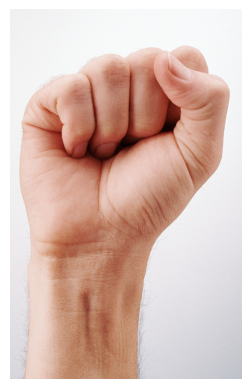

In [ ]:
plt.imshow(image)
plt.axis('off')
plt.show()

# Preprocess the image

In [ ]:
image = np.array([image[:,:,0]])  # Assuming it's a grayscale image
image = image.astype('float32') / 255.0  # Normalize pixel values

# Make a prediction using the loaded model

In [ ]:
import cv2
input_image = cv2.imread('/content/rockpaperscissors (1).JPG', cv2.IMREAD_GRAYSCALE)
input_image = cv2.resize(input_image, (300, 300))

input_image = input_image.astype('float32') / 255.0
input_image = input_image.reshape(1, 300, 300, 1)

  # Map predicted class to label (e.g., 'rock', 'paper', 'scissors')

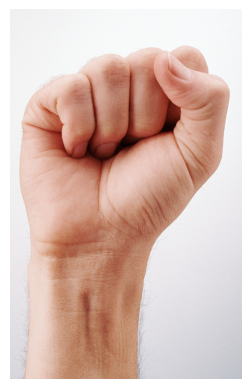

Predicted class: rock


In [ ]:
class_labels = ['rock', 'paper', 'scissors']
predicted_label = class_labels[0]  # Replace with the index of the predicted label

# Load and display the image
image_path = "/content/rockpaperscissors (1).JPG"  # Replace with the actual path to your image
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

print(f"Predicted class: {predicted_label}")